 - Contenido Creative Commons Attribution license, CC-BY 
 - Código con licencia MIT
 
![creative commons attribution](./images/CC-BY.png)

 - (c) Kyle T. Mandli
 - (c) Pablo Angulo y Fabricio Macià para ETSIN@UPM

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Error de redondeo

Comencemos con un ejemplo sencillo:

In [2]:
4.9 - 4.8 == 0.1

False

In [3]:
4.9 - 4.8

0.10000000000000053

In [4]:
0.1

0.1

In [5]:
round(4.9 - 4.8, 5) == 0.1

True

In [6]:
round(4.9,5) - round(4.8, 5) == 0.1


False

- La razón es que el ordenador puede representar únicamente una cantidad finita de números. 

- Cuantos números, y de qué características depende de la arquitectura de la máquina y del sistema de representación elegido.

### Números de coma flotante

Un sistema de números de coma flotante, representa algunos números reales en la forma siguiente:

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

donde
1. $\pm$ es un bit que representa el signo del número
2. $d_1 . d_2 d_3 d_4 \ldots d_p$ se denomina la *mantisa*. El punto decimal siempre está detrás del primer dígito. Se asume que $d_1 \neq 0$ a menos que el número esa exactamente $0$.
3. $\beta$ es la *base*. Puede ser base $\beta = 2$ para el sistema binario, o $\beta = 10$ para el decimal. Los dígitos $d_1, d_2, d_3, \ldots d_p$ representan el número $d_1 . d_2 d_3 d_4 \ldots d_p$ en *base* $\beta$.
4. $E$ es el *exponente*, un número entero.

[Aquí](https://fabiensanglard.net/floating_point_visually_explained/index.html) podéis consultar una introducción más visual al sistema de representación en coma flotante.

#### Características importantes

1. La cantidad de números representables es finita.
2. Estos números no están distribuidos de forma uniforme.
3. _La aritmética_ con números de coma flotante _no es exacta_, porque el resultado de una operación con dos números representables podría no ser representable (en ese caso, se busca el número representable más cercano).

El **desbordamiento** ocurre cuando el resultado de una operación es:

 - __overflow__: mayor que el número más grande representable en el sistema
 - __underflow__: menor que el número _positivo_ más pequeño representable en el sistema

Un overflow da lugar a un número especial del sistema: $\inf$ ó $-\inf$. Las operaciones continúan, y por ejemplo $1/\inf=0$, pero si se pide una indeterminación, el resultado es otro "número" especial del sistema: `undefined`.


In [7]:
# 64 bits precision

print(np.finfo(float))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



In [8]:
# 32 bits precision

print(np.finfo(np.float32))

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



In [9]:
# 16 bits precision

print(np.finfo(np.float16))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------



In [10]:
# 128 bits precision

print(np.finfo(np.float128))

print(np.finfo(np.longdouble))

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
---------------------------------------------------------------

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
---------------------------------------------------------------



### Epsilon de la máquina

Una cantidad especialmente relevante es el conocido como  $ \epsilon_{\text{machine}}$ o **epsilon de la máquina**.

Es la distancia entre el $1$ y el siguiente número de coma flotante (el siguiente número que es representable en la máquina). En otras palabras $ \epsilon_{\text{machine}}$ es el único numero positivo con la propiedad de que:

<center> 
no hay ningún número de coma flotante entre $1$ y $1+\epsilon_{\text{machine}}$.
</center>


El valor $ \epsilon_{\text{machine}}$ da una cota superior para el error relativo entre un número real $x$ y su redondeo $fl(x)$, el número de coma flotante más próximo a $x$ (hay varias formas de redondear, pero no las vamos a discutir). 

Concretamente, se cumple que:

$$
\frac{|x-fl(x)|}{|x|}\leq \frac{\epsilon_{\text{machine}}}{2}.
$$

In [11]:
# eps in different precisions

np.finfo(float).eps

# np.finfo(np.float32).eps
# np.finfo(np.float16).eps
# np.finfo(np.float128).eps

2.220446049250313e-16

In [12]:
# np.spacing(x) returns the gap between x and the next representable number after x

np.spacing(1e10)

1.9073486328125e-06

In [13]:
np.spacing(1) == np.finfo(float).eps

True

In [14]:
1+np.finfo(float).eps/2 == 1

True

In [15]:
np.spacing(2)==np.spacing(3)

True

In [16]:
np.spacing(2)==np.spacing(4)

False

In [17]:
((4.9 - 4.8) - 0.1)/ np.spacing(0.055)

76.0

In [18]:
4.9 - 4.8 == 0.1 + np.spacing(0.055)*76

True

### Real Systems - IEEE 754 Binary Floating Point Systems

#### Single Precision
 - Total storage alloted is 32 bits
 - Exponent is 8 bits $\Rightarrow E \in [-126, 127]$
 - Fraction 23 bits ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

#### Double Precision
 - Total storage alloted is 64 bits
 - Exponent is 11 bits $\Rightarrow E \in [-1022, 1024]$
 - Fraction 52 bits ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$

Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$

$\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### Aritmética en coma flotante

Cuando queramos distinguir las operaciones con números reales de las operaciones en el sistema de coma flotante, usaremos $\ominus$ para la resta, $ \oplus$ para la suma, etc.

Se pueden definir de esta forma:
 - recuerda que $fl(x)$ es el redondeo de $x$ (el número de coma flotante más próximo a $x$).
 - $x\oplus y = fl(x + y)$
 - $x\otimes y = fl(x \times y)$
 - etcétera...

Si los operandos $x$ e $y$ no son representables en el sistema, hay que definir:
 - $x\oplus y = fl(fl(x) + fl(y))$
 - $x\otimes y = fl(fl(x) \times fl(y))$
 - etcétera... 

In [19]:
1 + 1/3 - 1/3

1.0

In [20]:
def add_and_subtract(iterations):
    result = 1
    
    for i in range(iterations):
        result += 1/3

    for i in range(iterations):
        result -= 1/3
    return result

In [21]:
# Prueba con otros argumentos más grandes (con moderación, podría tardar demasiado)
# recuerda que puedes detener un cálculo usando el meńu "Kernel/Interrupt"
add_and_subtract(100)

1.0000000000000002

### Ejercicio 1:
 
Calcula las siguientes operaciones de dos formas: eligiendo primero $\delta=\epsilon_{\text{machine}}$ y eligiendo después $\delta$ más pequeño que $ \epsilon_{\text{machine}}$:

   $$1\oplus \delta \ominus 1 = (1\oplus \delta) \ominus 1 = 0$$

   $$1 \ominus 1 \oplus \delta = (1 \ominus 1) \oplus \delta = \delta$$

### Cancelación

Si el ejemplo anterior era _"inofensivo"_, observa qué ocurre **cuando restamos números	que son casi iguales**.

Supóngase $x$ e $y$ dos números casi iguales con $x>y$, con sus representaciones en coma flotante de $k$ dígitos
$$
\begin{align}
fl(x)=0.d_1d_2\ldots d_p\alpha_{p+1}\alpha_{p+2}\ldots \alpha_{k}\times10^n \nonumber \\
fl(y)=0.d_1d_2\ldots d_p\beta_{p+1}\beta_{p+2}\ldots \beta_{k}\times10^n \nonumber
\end{align}
$$
Al restarlos $x\ominus y$:
$$
fl(fl(x)-fl(y))=0.\sigma_{p+1}\sigma_{p+2}\ldots\sigma_{k}\times10^{n-p}
$$
con
$$
0.\sigma_{p+1}\sigma_{p+2}\ldots\sigma_{k}=0.\alpha_{p+1}\alpha_{p+2}\ldots\alpha_{k}-0.\beta_{p+1}\beta_{p+2}\ldots\beta_{k}
$$
La resta sólo tiene $k-p$ dígitos de precisión, aunque los operandos tenían $k$ dígitos de precisión.

### Ejemplo: resolver una ecuación de segundo grado

Las soluciones de la ecuación cuadrática:
$$
ax^2+bx+c=0
$$
se pueden calcular explícitamente mediante la fórmula:
$$
x_\pm = \frac{-b\pm\sqrt{b^2-4ac}}{2a}.
$$

In [22]:
# solves a quadratic equation ax^2+bx+c=0 using the quadratic formula

def raices(a,b,c):
    s = np.sqrt(b**2-4*a*c)
    return (-b + s)/(2*a), (-b - s)/(2*a)

In [23]:
raices(1,0,-1)

(1.0, -1.0)

Una fórmula clásica establece que el producto de las raíces sólo depende de los coeficientes de la ecuación:
$$
x_+ x_- = \frac{c}{a}.
$$

In [24]:
# the product of the two roots of the quadratic equation ax^2+bx+c=0 
# always equals c/a. This computes the relative error using raices(a,b,c)

def error_prod(a,b,c):
    r_1, r_2 = raices(a,b,c)
    return np.abs(c/a - r_1*r_2)/np.abs(c/a)

In [25]:
error_prod(1,0,-1)

0.0

In [26]:
error_prod(1, -14, -49)

1.450087215836939e-16

In [27]:
error_prod(3, -123454321, 2)

0.07310743009050646

In [28]:
raices(3, -123454321, 2)

(41151440.33333331, 1.7384688059488933e-08)

Comparamos con lo que obtiene la función `fsolve` del módulo `scipy.optimize`.

In [29]:
from scipy.optimize import fsolve

fsolve(lambda x : 3*x**2 - 123454321*x + 2, x0=1)

array([1.6200324e-08])

In [30]:
fsolve(lambda x : 3*x**2 - 123454321*x + 2, x0=40000000)

array([41151440.33333331])

Comprobamos que hemos aproximado una de las dos raíces bastante bien, pero la otra tiene un error relativo considerable: `1.74e-08` en vez de `1.62e-08`.

Una fórmula alternativa para calcular las raíces es:
$$
x_\pm = \frac{2c}{-b\mp\sqrt{b^2-4ac}}.
$$
Combinamos esta fórmula con la fórmula clásica para definir `raices2(a,b,c)`.

In [31]:
def raices2(a,b,c):
    s = np.sqrt(b**2-4*a*c)
    if b>0:
        return 2*c/(-b - s), (-b - s)/(2*a)
    else:
        return (-b + s)/(2*a), 2*c/(-b + s)
      

In [32]:
raices2(3, -123454321, 2)

(41151440.33333331, 1.6200324004860073e-08)

Mejor ¿no? 

¿Por qué?

### Otro ejemplo. 

La función $f(x) = x + 1$ tiene la siguiente gráfica:

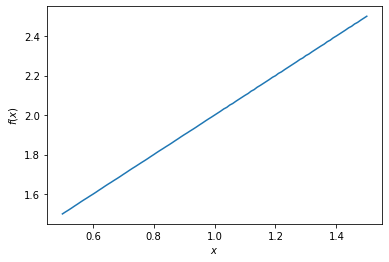

In [33]:
x = np.linspace(0.5, 1.5, 101, dtype=np.float16)
f = x + 1.0

plt.plot(x, f)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

### Ejercicio 2:

Calcula $f(x) = x + 1$ mediante $$F(x) = \frac{x^2 - 1}{x - 1},$$ y dibuja el error $|f-F|$ con distintas precisiones: `float16, float32, float, float128`


### Ejercicio 3: Evaluar una función

Considera la función
$$
    f(x) = \frac{1 - \cos x}{x^2}
$$
con $x\in[-10^{-4}, 10^{-4}]$ ($x$ cercano a $0$).

Al tomar el límite $x \rightarrow 0$ esperamos encontrar el límite:
$$
    \lim_{x \rightarrow 0} \frac{1 - \cos x}{x^2} = \lim_{x \rightarrow 0} \frac{\sin x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{2} = \frac{1}{2}.
$$

¿Pero qué ocurre al hacer el cálculo en coma flotante, con 32 bits de precisión? ¿Y con 64?

### Ejercicio 4: Evaluar un polinomio

Veremos que varias técnicas numéricas con mucha tradición se basan en polinomios de grado alto.

Pero evaluar un polinomio de grado alto introduce errores numéricos:

   $$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$
   
¿Qué ocurre cuando evaluamos este polinomio con las distintas precisiones del ejercicio 2? Representa gráficamente las gráficas del polinomio.

### Ejercicio 5:

El ruido numérico disminuye si evaluamos el polinomio de otra forma.

Busca en internet el algoritmo de Horner de _evalución anidada_. Esta _evaluación anidada_ requiere algunas operaciones menos y acumula menos error que la evaluación ingénua de un polinomio como hicimos en el apartado anterior. Evalúa el polinomio del apartado anterior usando este algoritmo.

El _orden al hacer las operaciones_ importa.

## Combinación de los dos tipos de error

En general tendremos que lidiar con el error de redondeo y el error de truncamiento a la vez. Con suerte, un error predomina, lo que simplifica el análisis, pero en general, los errores se propagan, se acumulan y a veces se amplifican.

### Ejercicio 6:

Aproxima la derivada de $f(x) = e^x$ en $x=1$ por la diferencia:

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Compara el error cuando $\Delta x$ decrece, entre la aproximación y la respuesta correcta $f'(1) = e$.

Indicación: la gráfica será más clara si la representamos en escala loglog con `plt.loglog(x,y)`. 